In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('D:\BITS PILANI\Applied Statistical Methods\Assignment - 2\dailydata.csv')

In [3]:
data.head()

,Unnamed: 0,GHI,Year,Month,Day,DayCode
0,0,4204,2000,1,1,0
1,0,4185,2000,1,2,1
2,0,4233,2000,1,3,2
3,0,4212,2000,1,4,3
4,0,4181,2000,1,5,4


In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
#data.drop(columns=['index'], inplace=True)
data.head()

,GHI,Year,Month,Day,DayCode
0,4204,2000,1,1,0
1,4185,2000,1,2,1
2,4233,2000,1,3,2
3,4212,2000,1,4,3
4,4181,2000,1,5,4


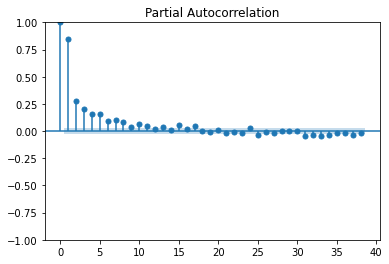

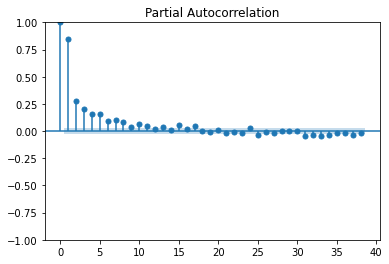

In [7]:
plot_pacf(data['GHI'])

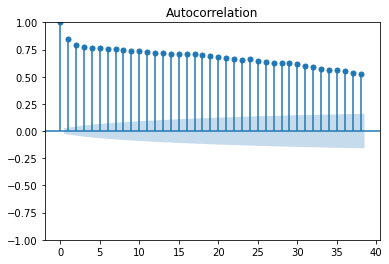

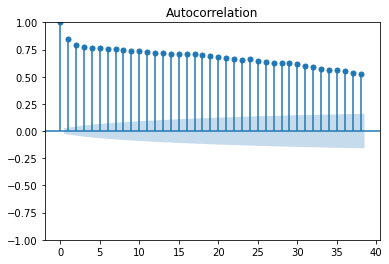

In [8]:
plot_acf(data['GHI'])

In [9]:
ad_fuller_result = adfuller(data['GHI'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.419308482668981
p-value: 3.0848507364933797e-06


In [10]:
#data['GHI'] = np.log(data['GHI'])
data['GHI'] = data['GHI'].diff()
data = data.drop(data.index[0])
#data.drop(columns=['Column1', 'Unnamed: 17', 'Unnamed: 18'])
data.reset_index(inplace=True)

In [11]:
data.head()

,index,GHI,Year,Month,Day,DayCode
0,1,-19.0,2000,1,2,1
1,2,48.0,2000,1,3,2
2,3,-21.0,2000,1,4,3
3,4,-31.0,2000,1,5,4
4,5,83.0,2000,1,6,5


In [12]:
data = data.drop(columns=['index'])
data.head()

,GHI,Year,Month,Day,DayCode
0,-19.0,2000,1,2,1
1,48.0,2000,1,3,2
2,-21.0,2000,1,4,3
3,-31.0,2000,1,5,4
4,83.0,2000,1,6,5


In [13]:
#data = data.drop(columns='Column1')
data.head()

,GHI,Year,Month,Day,DayCode
0,-19.0,2000,1,2,1
1,48.0,2000,1,3,2
2,-21.0,2000,1,4,3
3,-31.0,2000,1,5,4
4,83.0,2000,1,6,5


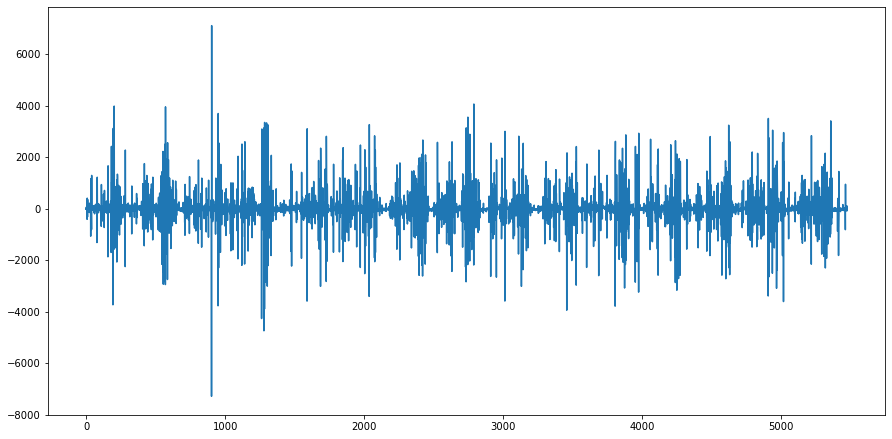

In [14]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure

plt.plot(data['GHI'])

plt.show()

In [15]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(exog, order=order).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [16]:
ps = range(0, 15, 1)
d = 1
qs = range(0, 15, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, 1)
    each = tuple(each)
    order_list.append(each)
    
result_df = optimize_ARIMA(order_list, exog=data['GHI'])

result_df


  0%|          | 0/225 [00:00<?, ?it/s]

,"(p, d, q)",AIC
0,"(1, 1, 2)",85024.422459
1,"(4, 1, 2)",85025.138571
2,"(2, 1, 2)",85025.775780
3,"(0, 1, 7)",85025.972853
4,"(0, 1, 5)",85026.150505
...,...,...
220,"(4, 1, 0)",87302.553600
221,"(3, 1, 0)",87867.508378
222,"(2, 1, 0)",88482.488747
223,"(1, 1, 0)",89636.179759


In [27]:
best_model = SARIMAX(data['GHI'], order=(1,1,2)).fit()
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                    GHI   No. Observations:                 5474
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -42508.211
Date:                Mon, 12 Dec 2022   AIC                          85024.422
Time:                        12:32:43   BIC                          85050.853
Sample:                             0   HQIC                         85033.644
                               - 5474                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2973      0.011     28.301      0.000       0.277       0.318
ma.L1         -1.8466      0.008   -245.551      0.000      -1.861      -1.832
ma.L2          0.8466      0.007    114.526      0.0

In [28]:
prediction = best_model.predict(start=0, end=10000)
prediction1 = best_model.predict(start=0, end=5472)

In [29]:
diff = prediction1 - data['GHI']
diff

0        19.000000
1       -60.989113
2        25.701806
3        38.148291
4       -76.395171
           ...    
5469     49.641073
5470    -31.468984
5471     24.319551
5472   -101.312679
5473           NaN
Length: 5474, dtype: float64

<AxesSubplot:>

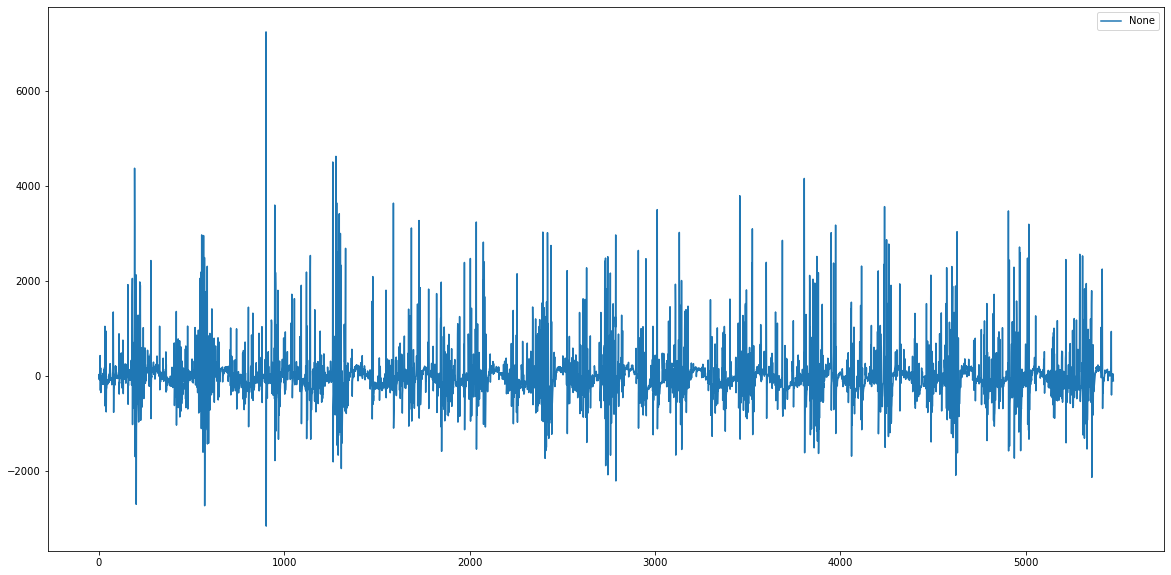

In [30]:
diff.plot(figsize=(20,10),legend=True)

<AxesSubplot:>

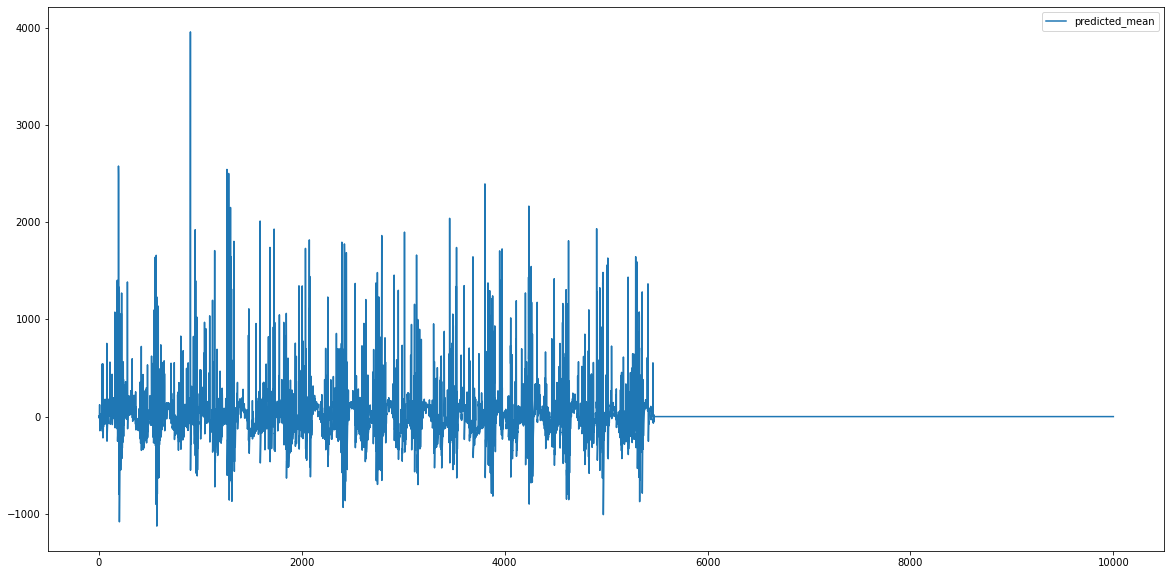

In [31]:
prediction.plot(figsize=(20,10), legend=True)

<AxesSubplot:>

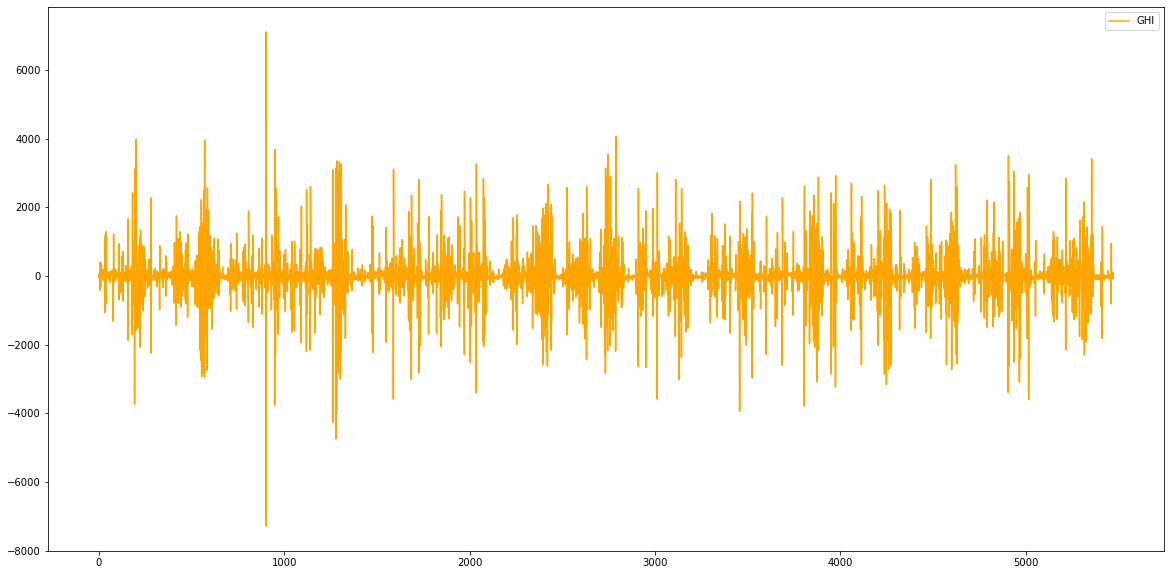

In [32]:
data['GHI'].plot(figsize=(20,10), legend=True, color='orange')

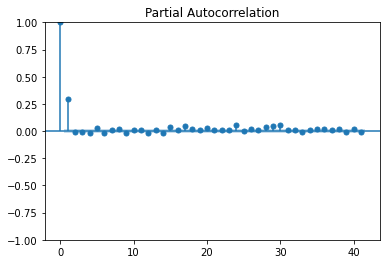

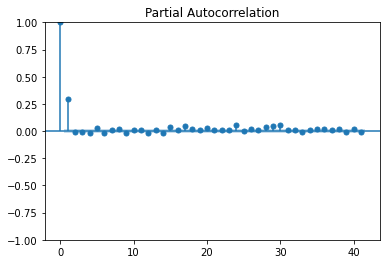

In [33]:
plot_pacf(prediction)

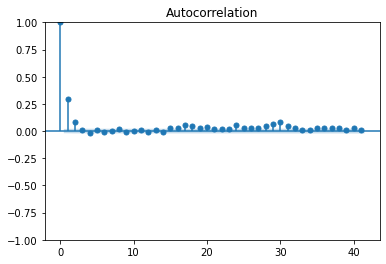

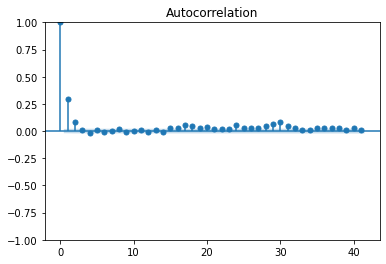

In [34]:
plot_acf(prediction)

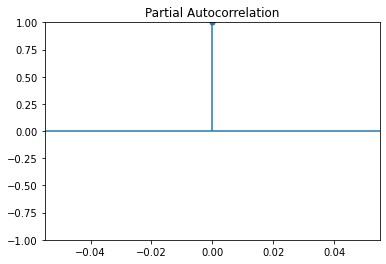

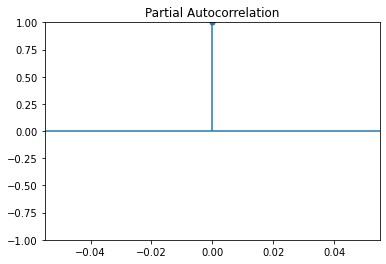

In [35]:
plot_pacf(diff)

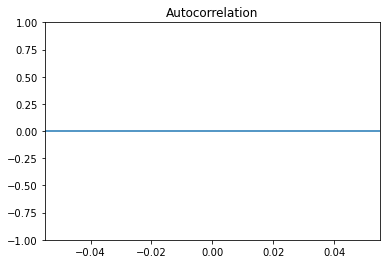

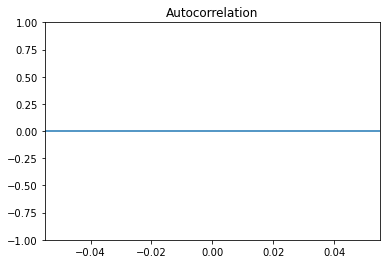

In [36]:
plot_acf(diff)